In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from sklearn.model_selection import train_test_split
from google.colab import drive
import os
import tensorflow as tf
import cv2
from tqdm import tqdm

In [ ]:
drive.mount('/content/gdrive')
TRAIN_DIR = 'gdrive/My Drive/Pneumonia Detection By Analyzing of Xray Report using DEEP Learning/DataSet Of Xray'  #change dir to your project folder


Mounted at /content/gdrive


In [ ]:
os.listdir(TRAIN_DIR)

['PNEUMONIA', 'NORMAL']

In [ ]:

class_names = ['PNEUMONIA', 'NORMAL']

class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
print(class_names_label)
nb_classes = len(class_names)


IMAGE_SIZE = (224,224)

{'PNEUMONIA': 0, 'NORMAL': 1}


In [ ]:
datasets = [TRAIN_DIR]
output = []
for dataset in datasets:
   images = []
   labels = []

        # Iterate through each folder corresponding to a category
   for folder in os.listdir(dataset):
    label = class_names_label[folder]
               # Iterate through each image in our folder
    for file in os.listdir(TRAIN_DIR+"/"+folder):
               # Get the path name of the image
      # print(file)
       img_path = os.path.join(os.path.join(dataset, folder), file)
       #print(img_path)
               # Open and resize the img
       image = cv2.imread(img_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (224,224))
               # Append the image and its corresponding label to the output
       images.append(image)
       labels.append(label)
   imagess = np.array(images, dtype = 'float32')
   labelss = np.array(labels, dtype = 'int32')

   train_images=imagess
   train_labels=labelss

In [ ]:
X_train, X_test,Y_train,Y_test= train_test_split( imagess,labelss,test_size=0.33, random_state=42)


#ResNet101V2



In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet101V2

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
IMAGE_SIZE = [224, 224]

In [ ]:
resnet_v2 = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet_v2.layers:
  layer.trainable = False
  # our layers - you can add more if you want
x = Flatten()(resnet_v2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet_v2.input, outputs=prediction)

# view the structure of the model
model.summary()


171319296/171317808 [==============================] - 7s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
history = model.fit( X_train, Y,
                    epochs = 20, batch_size = 100,
                    verbose=1,
                    validation_data = (X_test, Y_Test))

Epoch 1/20
40/40 [==============================] - 1565s 39s/step - loss: 922.2951 - accuracy: 0.7075 - val_loss: 157.8298 - val_accuracy: 0.8176
Epoch 2/20
40/40 [==============================] - 1556s 39s/step - loss: 76.7742 - accuracy: 0.8923 - val_loss: 31.3879 - val_accuracy: 0.9295
Epoch 3/20
40/40 [==============================] - 1562s 39s/step - loss: 30.5290 - accuracy: 0.9273 - val_loss: 20.1222 - val_accuracy: 0.9472
Epoch 4/20
40/40 [==============================] - 1562s 39s/step - loss: 20.9338 - accuracy: 0.9342 - val_loss: 47.2134 - val_accuracy: 0.8751
Epoch 5/20
40/40 [==============================] - 1566s 39s/step - loss: 26.5382 - accuracy: 0.9153 - val_loss: 34.0289 - val_accuracy: 0.8927
Epoch 6/20
23/40 [================>.............] - ETA: 7:29 - loss: 22.4386 - accuracy: 0.9257

In [ ]:
model.save('gdrive/My Drive/pneumonia ResNet 101')

INFO:tensorflow:Assets written to: gdrive/My Drive/pneumonia ResNet 101/assets


In [ ]:
new_model = tf.keras.models.load_model('gdrive/My Drive/pneumonia ResNet 101')

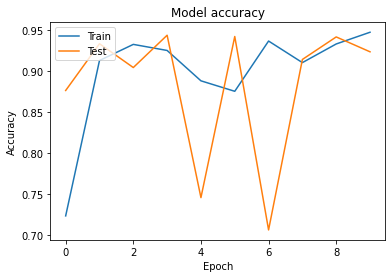

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


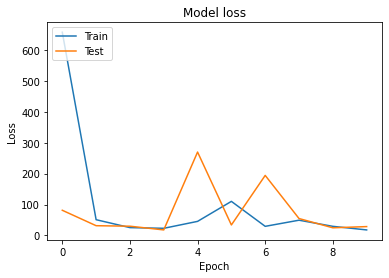

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn


Y_pred = new_model.predict_generator(validation_generator, 1845//32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

cm=(confusion_matrix(validation_generator.classes, y_pred))
sn.heatmap(cm, annot=True)
plt.show()

In [ ]:
dtree_predictions =new_model.predict(X_test)


In [ ]:
 from sklearn.metrics import classification_report


In [ ]:
print('Classification Report')
class_names = class_names
print(classification_report(Y_Test.argmax(axis=1),dtree_predictions.argmax(axis=1), target_names=class_names))

Classification Report
              precision    recall  f1-score   support

   PNEUMONIA       0.99      0.91      0.95      1416
      NORMAL       0.79      0.96      0.87       514

    accuracy                           0.92      1930
   macro avg       0.89      0.94      0.91      1930
weighted avg       0.93      0.92      0.93      1930



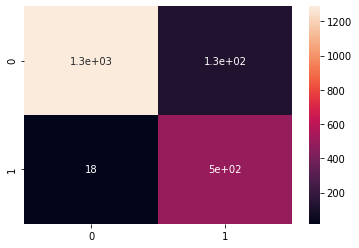

In [ ]:
from sklearn.metrics import confusion_matrix
#print(np.argmax(dtree_predictions, axis=1))
cm = confusion_matrix(Y_Test.argmax(axis=1),dtree_predictions.argmax(axis=1))
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.show()

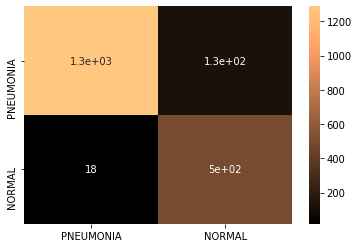

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in class_names],
              columns = [i for i in class_names])
plt.figure()

sn.heatmap(df_cm, annot=True,cmap="copper")